# Check distribution of likelihood ratio against Wilk's theorem

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

## Data

In [2]:
filenames = [
    "carl_fix",
    "alice_fix",
    "alices_fix",
    #"carl_mass",
    #"alice_mass",
    #"alices_mass",
    #"carl_align",
    #"alice_align",
    #"alices_align",
]
labels = [
    "CARL (fix)",
    "ALICE (fix)",
    "ALICES (fix)",
    "CARL (mass)",
    "ALICE (mass)",
    "ALICES (mass)",
    "CARL (align)",
    "ALICE (align)",
    "ALICES (align)",
    "CARL (full)",
    "ALICE (full)",
    "ALICES (full)",
    "CARL (full-aux)",
    "ALICE (full-aux)",
    "ALICES (full-aux)",
]
nmethods = len(filenames)


In [3]:
llrs = []
for filename in filenames:
    llrs.append(np.load("../data/results/llr_{}_grid.npy".format(filename)))
llrs = np.array(llrs)

## Calculate likelihood ratio wrt best fit

In [4]:
resolution = 25

f_sub_1d = np.linspace(0.001, 0.200, resolution)
beta_1d = np.linspace(-2.5, -1.5, resolution)

theta0, theta1 = np.meshgrid(f_sub_1d, beta_1d)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T

bin_size = f_sub_1d[1] - f_sub_1d[0]
alpha_edges = np.linspace(f_sub_1d[0] - bin_size/2, f_sub_1d[-1] + bin_size/2, resolution + 1)
bin_size = beta_1d[1] - beta_1d[0]
beta_edges = np.linspace(beta_1d[0] - bin_size/2, beta_1d[-1] + bin_size/2, resolution + 1)

In [5]:
idx_mle = np.argmax(llrs, axis=1)
theta_mle = theta_grid[idx_mle]

In [6]:
for i in range(nmethods):
    bincount = np.bincount(idx_mle[0])
    idx_mle_max = np.argmax(bincount)
    n_mle_max = np.max(bincount)
    print(labels[i], theta_grid[idx_mle_max], n_mle_max / len(idx_mle[0]))

CARL (fix) [ 0.01758333 -2.41666667] 0.16259
ALICE (fix) [ 0.01758333 -2.41666667] 0.16259
ALICES (fix) [ 0.01758333 -2.41666667] 0.16259


In [7]:
idx_true = 259
llr_true = llrs[:, idx_true]
print(theta_grid[idx_true])
llr_mle = np.max(llrs, axis=1)

[ 0.075625   -2.08333333]


In [8]:
q = -2. * (llr_true - llr_mle)

In [9]:
llrs[0]

array([[-5.7449784e+00, -3.6159358e+00, -5.1245389e+00, ...,
        -7.6228018e+00, -5.4705820e+00, -3.3123798e+00],
       [-2.1253068e+00, -4.0341878e-01, -1.6747446e+00, ...,
        -5.4089890e+00, -2.2972281e+00, -9.2587486e-02],
       [ 5.8233577e-01,  2.1539643e+00,  9.3965852e-01, ...,
        -3.7027702e+00,  1.5646319e-01,  1.9287438e+00],
       ...,
       [ 4.7154105e-01, -1.2356578e-01, -5.0456971e-03, ...,
         9.7098267e-01,  7.5586563e-01,  3.5281503e-01],
       [ 5.4435170e-01, -1.2911566e-01,  4.8442677e-02, ...,
         1.0268414e+00,  7.9310250e-01,  3.2071432e-01],
       [ 5.3880191e-01, -2.5271666e-01,  4.2892650e-02, ...,
         1.0825944e+00,  8.2212937e-01,  1.5103085e-01]], dtype=float32)

## Plot test statistic histo

In [30]:
qmin = 0.
qmax = 30.
qbins = 100


In [31]:
wilks = chi2.rvs(size=100000, df=2)

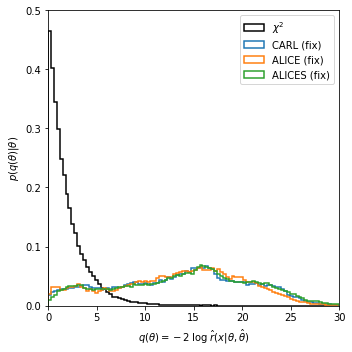

In [33]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.hist(
    wilks, range=(qmin, qmax), bins=qbins,
    histtype="step", density=True,
    lw=1.5, color="black",
    label=r"$\chi^2$"
)
for i in range(nmethods):
    plt.hist(
        q[i], range=(qmin, qmax), bins=qbins,
        histtype="step", density=True,
        lw=1.5, color="C{}".format(i),
        label=labels[i]
    )
    
plt.legend()
    
#ax.set_yscale("log")
plt.xlim(qmin, qmax)
plt.ylim(0., .5)

plt.xlabel(r"$q(\theta) = -2\; \log \; \hat{r}(x|\theta, \hat{\theta})$")
plt.ylabel(r"$p(q(\theta) | \theta)$")
    
plt.tight_layout()
plt.savefig("../figures/chi_squared.pdf")

## Plot MLE

In [13]:
theta_mle[0]

array([[ 0.025875  , -2.45833333],
       [ 0.025875  , -2.41666667],
       [ 0.025875  , -2.45833333],
       ...,
       [ 0.125375  , -1.79166667],
       [ 0.05075   , -1.95833333],
       [ 0.01758333, -2.45833333]])

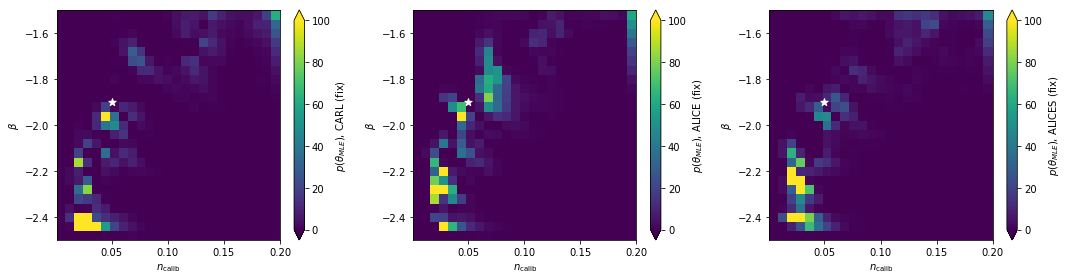

In [23]:
fig = plt.figure(figsize=(nmethods * 5, 4.))

for i in range(nmethods):
    ax = plt.subplot(1, nmethods, i+1)
    
    cm = plt.hist2d(
        theta_mle[i,:,0], theta_mle[i,:,1],
        bins=[25, 25],
        range=[[0.001,0.2], [-2.5,-1.5]],
        normed=True,
        norm=matplotlib.colors.Normalize(0., 100.),
        cmap="viridis"
    )[3]
    cbar = fig.colorbar(cm, ax=ax, extend='both', )
    cbar.set_label(r'$p(\theta_{MLE})$' + ', {}'.format(labels[i]))
    plt.scatter(0.05, -1.9, s=60., color='white', marker='*')

    plt.xlabel(r'$n_{\mathrm{calib}}$')
    plt.ylabel(r'$\beta$')
    
plt.tight_layout()
plt.savefig("../figures/mle_distribution.pdf")